In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv('../titanic/train.csv')

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### get survival ratio for non-null categorical variables & discrete

In [10]:
class_sur_ratio = df_train.groupby('Pclass')["Survived"].sum() / df_train.groupby('Pclass')["Survived"].count()
class_sur_ratio

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
sex_sur_ratio = df_train.groupby('Sex')["Survived"].sum() / df_train.groupby('Sex')["Survived"].count()
sex_sur_ratio

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
sibSp_sur_ratio =df_train.groupby('SibSp')["Survived"].sum() / df_train.groupby('SibSp')["Survived"].count()
sibSp_sur_ratio

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [15]:
Parch_sur_ratio =df_train.groupby('Parch')["Survived"].sum() / df_train.groupby('Parch')["Survived"].count()
Parch_sur_ratio                                                                                      

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [4]:
len(df_train)

891

#### oversampling

In [28]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)

In [32]:
df_train = df_train.drop(['Cabin'],axis = 1)

In [38]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [39]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### undersampling

In [15]:
survival = df_train[df_train['Survived'] == 1]
len(survival)

342

In [16]:
not_survival =df_train[df_train['Survived'] == 0]
len(not_survival)

549

In [18]:
df_train.sample(frac = 1)
survival = df_train[df_train['Survived'] == 1]
not_survival =df_train[df_train['Survived'] == 0][:342]
normal_distributed_df = pd.concat([survival, not_survival])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.50,NaN,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.00,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.00,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S


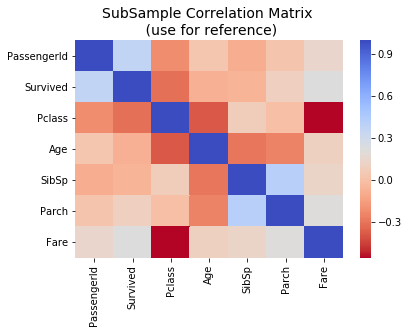

In [22]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}).set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### pclass is negatively associated with survived